# Tutorial: global_ocean.cs32x15

### Written by M. Wood. June 2021

This verification experiment is almost identical to the global_ocean.cs32x15 experiment configured with the files in the `global_ocean.cs32x15/input.seaice` directory, except that it uses `diagnostics_vec` to output variables from the model and compares them to variables from the `diagnostics` package to show that the two packages are identical.

The `global_ocean.cs32x15` experiment provides a demonstration of a cubed sphere configuration that utilizes the exch2 package. Numerically, the model grid is stored in a long array, with tile connections described by the data.exch2 file (or defined implicitly in the code). Here, we demonstrate that the `diagnostics_vec` package can handle configurations that utilize the exch2 (and seaice) package.

This tutorial follows 5 steps:
1. Prepare the configuration
2. Prepare the diagnostic_vec masks
3. Build the model
4. Run the model
5. Compare diagnostics_vec vs diagnostics_output


### 1. Prepare the configuration
To prepare the configuration, `cd` to the `input_dv` directory within the `global_ocean.cs32x15`  experiment. As for the code in the base experiment `input` directory, we provide a **prepare_run** script which can be used to generate all of the necessary files (aside from the few already provided). Run this from the command line, e.g.:

### 2. Prepare the diagnostics_vec masks

The diagnostics_vec masks are generated using a simple Python script, `create_masks.py`, which is additionally provided in the input_dv directory. Create the masks (from within the input_dv directory) by running the script:

This script creates two masks - one which transverses the global along the equator, and one which traverses the global along the prime meridian (from south pole to north pole along 0 degrees longitude, and then north pole to south pole along 180 degrees longitude). To view these masks relative to the model bathymetry, we can read and plot them as follows:

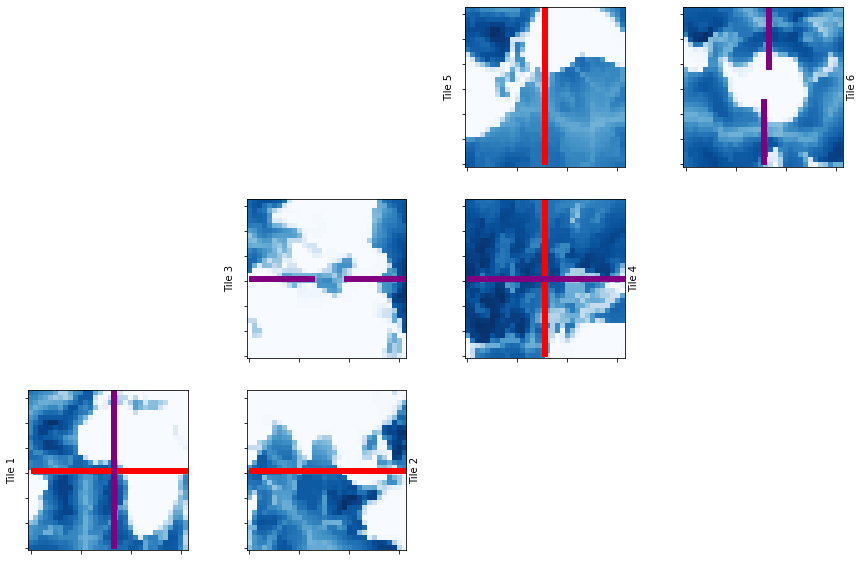

In [12]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# set the path to the input directory (UPDATE FOR YOUR SYSTEM)
input_dir = '../../../MITgcm_fresh/verification/global_ocean.cs32x15/input_dv'

# read in the model bathymetry
bathy_file = os.path.join(input_dir, 'bathy_Hmin50.bin')
bathy_grid = np.fromfile(bathy_file, dtype='>f8')
bathy_grid = np.reshape(grid, (32, 6, 32))

# read in the mask files
equator_file = os.path.join(input_dir, 'equator_mask.bin')
equator_mask = np.fromfile(equator_file, dtype='>f8')
equator_mask = np.reshape(equator_mask, (32, 6, 32))

prime_meridian_file = os.path.join(input_dir, 'prime_meridian_mask.bin')
prime_meridian_mask = np.fromfile(prime_meridian_file, dtype='>f8')
prime_meridian_mask = np.reshape(prime_meridian_mask, (32, 6, 32))

# plot the masks on the bathymetry (in a coherent fashion)
fig = plt.figure(figsize=(15,10))
tile_array_to_plot_IJ = {1:[3,1],2:[3,2],3:[2,2],4:[2,3],5:[1,3],6:[1,4]}
mask_plot_colors = ['red','purple']

for i in range(1,7):
    row = tile_array_to_plot_IJ[i][0]
    col = tile_array_to_plot_IJ[i][1]
    plot_counter = (row-1)*4+col
    plt.subplot(3,4,plot_counter)

    # plot the var
    C = plt.imshow(bathy_grid[:,i-1,:],origin='lower',cmap='Blues_r',
                   vmin=np.min(bathy_grid),vmax = np.max(bathy_grid))

    # plot the equator mask (where its positive)
    mask_subset = equator_mask[:,i-1,:]
    rows, cols = np.where(mask_subset != 0)
    for pt in range(len(rows)):
        rect = Rectangle((cols[pt], rows[pt]), 1, 1, color='red')
        plt.gca().add_patch(rect)
    
    # plot the prime meridian mask (where its positive)
    mask_subset = prime_meridian_mask[:,i-1,:]
    rows, cols = np.where(mask_subset != 0)
    for pt in range(len(rows)):
        rect = Rectangle((cols[pt], rows[pt]), 1, 1, color='purple')
        plt.gca().add_patch(rect)
        
    # annotate the subplot
    if i%2==0:
        plt.gca().yaxis.set_label_position("right")
    plt.ylabel('Tile '+str(i))
    # plt.colorbar(C)
    plt.gca().set_xticklabels([])
    plt.gca().set_yticklabels([])
    # plt.title(str(i))
    # plt.suptitle('Mask: '+mask_name)
plt.show()
